# **Logistic Regression in python on Wisconsin Breast cancer (diagnostic) UCI data**

## **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## **Importing the dataset**

In [2]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **Encoding categorical data**

In [3]:
df['diagnosis'] = df['diagnosis'].replace({'M' : 1, 'B' : 0})
#df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **Perform Exploratory Data Analysis (EDA) & Data Visualization**

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

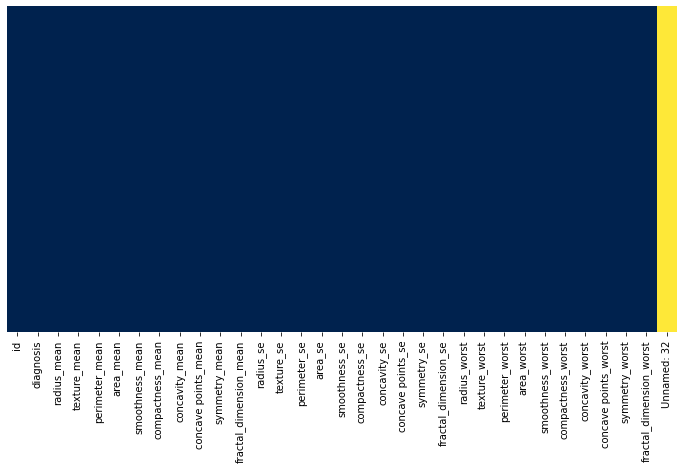

In [5]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'cividis');

In [6]:
df = df.drop(['Unnamed: 32','id'], axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [8]:
df.corr().unstack().sort_values(ascending = False).drop_duplicates()[1:20]

perimeter_mean   radius_mean            0.997855
radius_worst     perimeter_worst        0.993708
radius_mean      area_mean              0.987357
perimeter_mean   area_mean              0.986507
area_worst       radius_worst           0.984015
                 perimeter_worst        0.977578
perimeter_se     radius_se              0.972794
perimeter_worst  perimeter_mean         0.970387
radius_worst     radius_mean            0.969539
perimeter_mean   radius_worst           0.969476
perimeter_worst  radius_mean            0.965137
radius_worst     area_mean              0.962746
area_worst       area_mean              0.959213
perimeter_worst  area_mean              0.959120
area_se          radius_se              0.951830
perimeter_mean   area_worst             0.941550
area_worst       radius_mean            0.941082
perimeter_se     area_se                0.937655
concavity_mean   concave points_mean    0.921391
dtype: float64

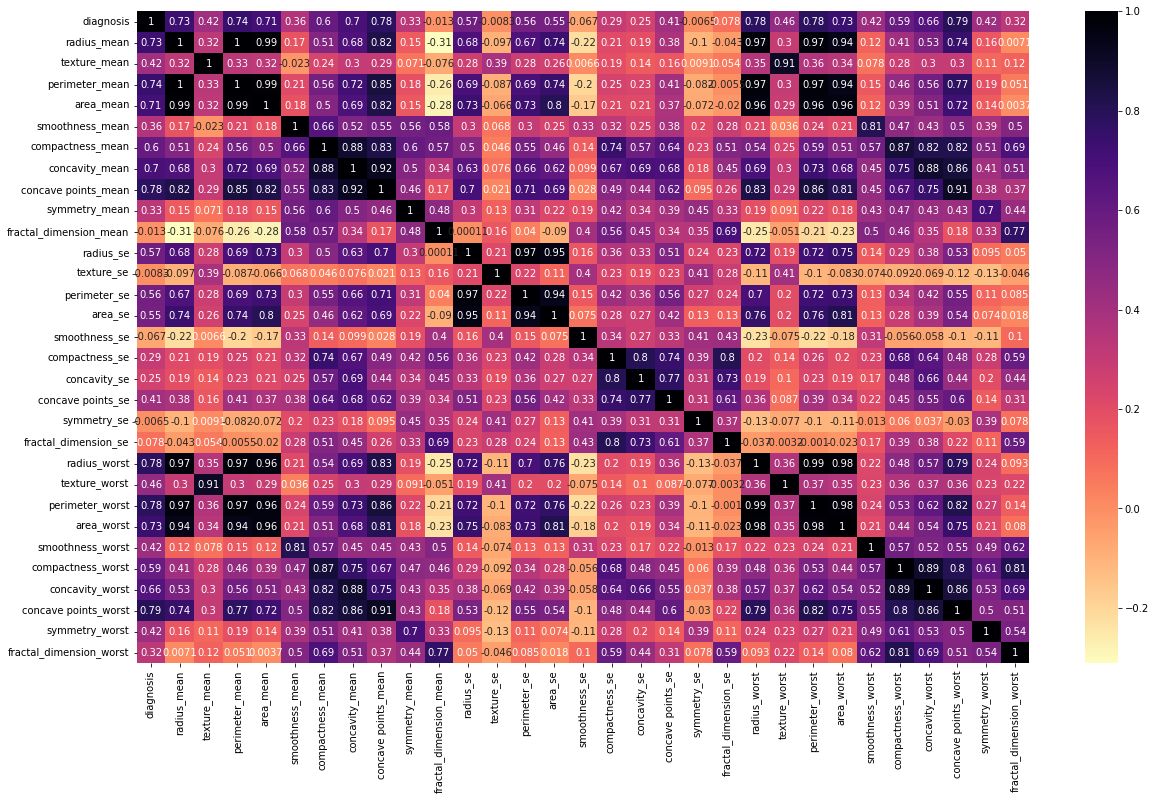

In [9]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(), cmap ='magma_r', annot = True);

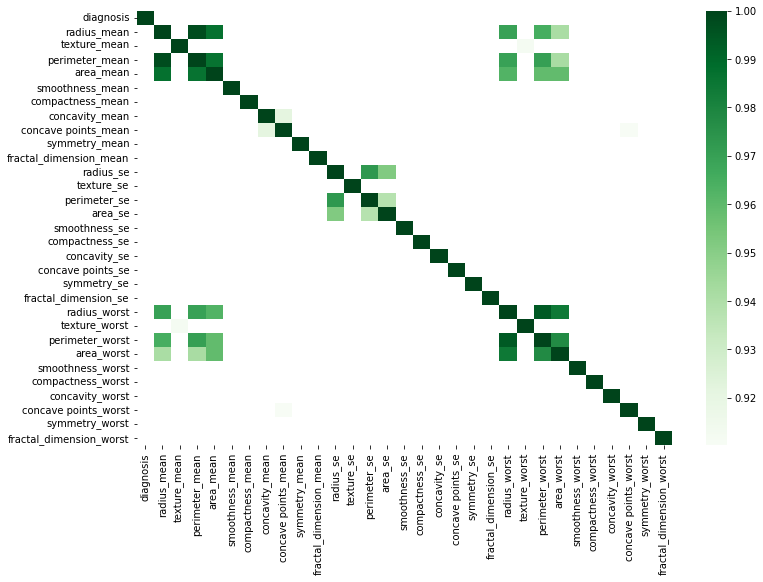

In [10]:
corr = df.corr()
corr_top = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="Greens");

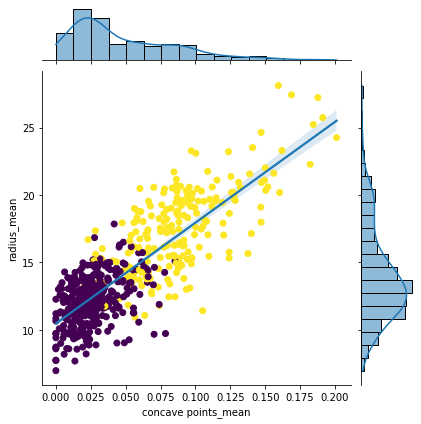

In [11]:
g = sns.jointplot(x='concave points_mean',y='radius_mean',data=df, kind='reg', scatter = False )
g.ax_joint.scatter(x='concave points_mean',y='radius_mean',data=df, c ='diagnosis');

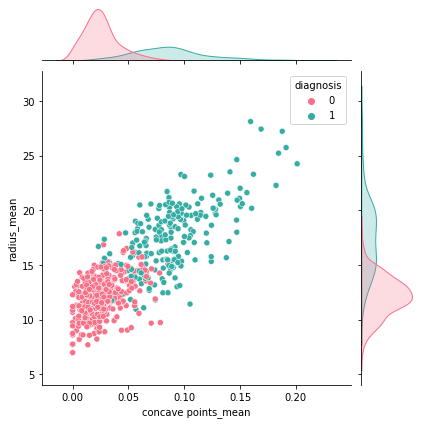

In [12]:
sns.jointplot(x='concave points_mean',y='radius_mean',data=df, hue = 'diagnosis', kind= 'scatter', palette = 'husl');

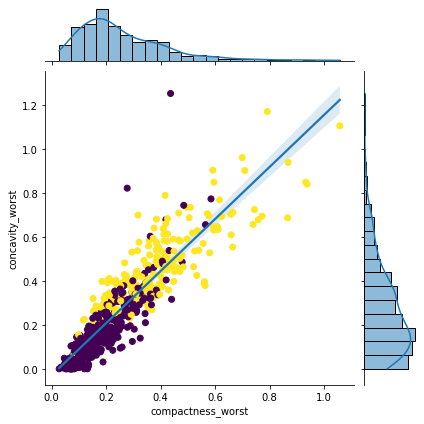

In [13]:
g = sns.jointplot(x='compactness_worst',y='concavity_worst',data=df, kind='reg', scatter = False )
g.ax_joint.scatter(x='compactness_worst',y='concavity_worst',data=df, c ='diagnosis');

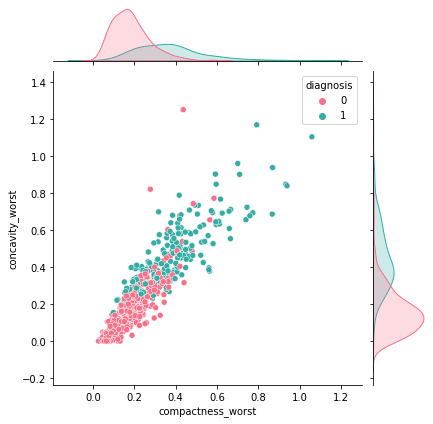

In [14]:
sns.jointplot(x='compactness_worst',y='concavity_worst',data=df, hue = 'diagnosis', kind= 'scatter', palette = 'husl');

## **Splitting the dataset into the Train set and Test set**

In [15]:
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Training the Logistic Regression model on the Train set**

In [17]:
from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(max_iter=len(X))
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## **Predicting the Test set results**

In [18]:
y_prob = classifier.predict_proba(X_test)
y_prob[1:5]

array([[9.69509711e-01, 3.04902888e-02],
       [9.98667581e-01, 1.33241889e-03],
       [8.58115622e-01, 1.41884378e-01],
       [9.99969186e-01, 3.08142372e-05]])

In [19]:
y_pred = classifier.predict(X_test)
y_pred[1:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

## **Generating the Confusion Matrix and Classification report**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of LogisticRegression Model is ', accuracy_score(y_test, y_pred))
print('\n', '\n','Confusion Matrix of LogisticRegression Model:' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for LogisticRegression Model:' '\n',classification_report(y_test, y_pred))

Accuracy of LogisticRegression Model is  0.9473684210526315

 
 Confusion Matrix of LogisticRegression Model:
 [[62  5]
 [ 1 46]]

 
 Classification Report for LogisticRegression Model:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



## **Computing the accuracy with k-Fold Cross Validation**

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.39 %
Standard Deviation: 2.65 %
